In [1]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer 
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /home/xipher/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train = pd.read_pickle('df_train')
test = pd.read_pickle('df_test')

In [4]:
train_text['len'] = train_text['Text'].apply(lambda x : len(x.split()))

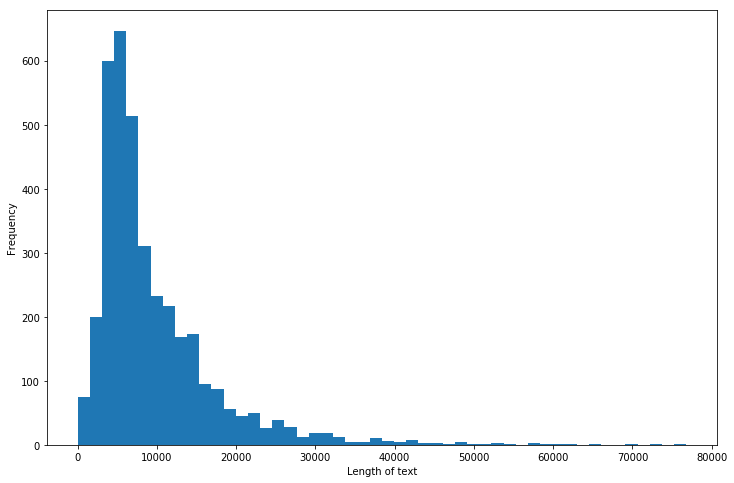

In [5]:
train['len'] = train['Text'].apply(lambda x : len(x.split()))
plt.figure(figsize=(12,8))
train['len'].plot.hist(bins=50)
plt.xlabel('Length of text')
plt.show()

In [6]:
def textClean(text):
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = text.lower().split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]    
    text = " ".join(text)
    return(text)
    
def stem(text):
    stemmed = ""
    for word in text.split(" "):
        wordx = PorterStemmer().stem(word)
        stemmed+=wordx
        stemmed+=" "
    return stemmed

def cleanup(text):
    text = textClean(text)
    text = stem(text)
    text= text.translate(str.maketrans("","", string.punctuation))
    return text

In [7]:
train['sText'] = train['Text'].apply(cleanup)

In [15]:
test['sText'] = test['Text'].apply(cleanup)

In [9]:
train['Text']

0       Cyclin-dependent kinases (CDKs) regulate a var...
1        Abstract Background  Non-small cell lung canc...
2        Abstract Background  Non-small cell lung canc...
3       Recent evidence has demonstrated that acquired...
4       Oncogenic mutations in the monomeric Casitas B...
5       Oncogenic mutations in the monomeric Casitas B...
6       Oncogenic mutations in the monomeric Casitas B...
7       CBL is a negative regulator of activated recep...
8        Abstract Juvenile myelomonocytic leukemia (JM...
9        Abstract Juvenile myelomonocytic leukemia (JM...
10      Oncogenic mutations in the monomeric Casitas B...
11      Noonan syndrome is an autosomal dominant conge...
12      Noonan syndrome is an autosomal dominant conge...
13      Noonan syndrome is an autosomal dominant conge...
14      Oncogenic mutations in the monomeric Casitas B...
15      Noonan syndrome is an autosomal dominant conge...
16      To determine if residual cylindrical refractiv...
17      Acquir

In [10]:
train['sText']

0       cyclindepend kinas cdk regul varieti fundament...
1       abstract background nonsmal cell lung cancer n...
2       abstract background nonsmal cell lung cancer n...
3       recent evid demonstr acquir uniparent disomi a...
4       oncogen mutat monomer casita blineag lymphoma ...
5       oncogen mutat monomer casita blineag lymphoma ...
6       oncogen mutat monomer casita blineag lymphoma ...
7       cbl neg regul activ receptor tyrosin kinas rtk...
8       abstract juvenil myelomonocyt leukemia jmml ch...
9       abstract juvenil myelomonocyt leukemia jmml ch...
10      oncogen mutat monomer casita blineag lymphoma ...
11      noonan syndrom autosom domin congenit disord e...
12      noonan syndrom autosom domin congenit disord e...
13      noonan syndrom autosom domin congenit disord e...
14      oncogen mutat monomer casita blineag lymphoma ...
15      noonan syndrom autosom domin congenit disord e...
16      determin residu cylindr refract error cataract...
17      acquir

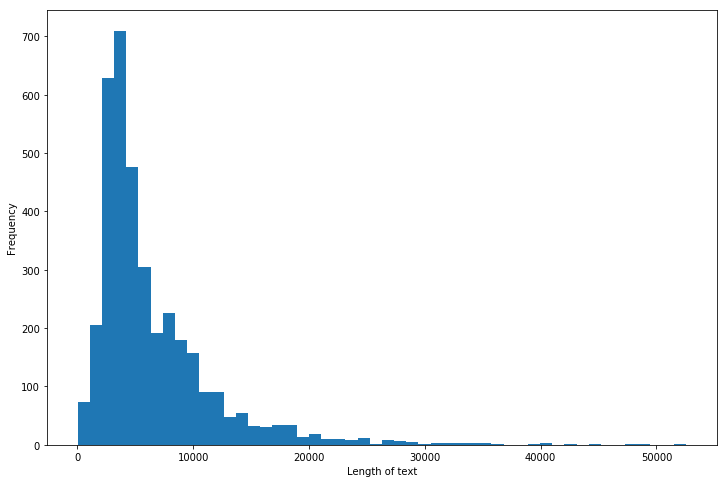

In [11]:
train['slen'] = train['sText'].apply(lambda x : len(x.split()))
plt.figure(figsize=(12,8))
train['slen'].plot.hist(bins=50)
plt.xlabel('Length of text')
plt.show()

In [12]:
train['len'].sum()

35420818

In [14]:
train['slen'].sum()

23769050

In [17]:
train.to_pickle('df_strain')

In [16]:
test.to_pickle('df_stest')